<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DPM2310/blob/main/Ago25-26/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En un cuaderno terminar la implementación de mínimos cuadrados regularizado y el método de cross validación para selección de modelos.


# **Metodo de Minimos Cuadrados Regularizado**

Ahora consideramos:

$$f(x_i)=w_0+w_1x+w_2x^2+w_3x^3+...$$

Tendremos la funcion costo modificado:

$$L'=L+λw^Tw$$

Minimizando la funcion costo, obtenemos una nueva forma de calcular los pesos de la funcion:

$$w=(X^TX+NλI)^{-1}X^Tt$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Importamos nuestro dataset desde Drive
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Data/olympic100m_men.txt"

data=np.loadtxt(file,delimiter=",").T

Mounted at /content/drive


In [2]:
# Creamos la funcion que nos devuelve los pesos

def w_regularizados(x, y, lambd, n=1):
  N = len(x)
  datax = [x**(i) for i in range(n+1)]
  X = np.vstack(datax).T
  w = np.linalg.inv(X.T @ X + N*lambd*np.eye(X.shape[1])) @ X.T @ y

  return w

In [5]:
x = (data[0] - 1896)/4 #Normalziados
y = data[1]

x_aux = np.linspace(np.min(x), np.max(x), 250)

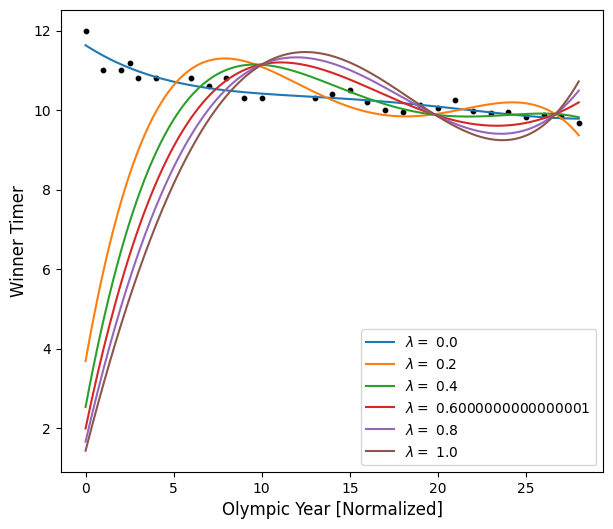

In [7]:
# Graficamos el ajuste
def poly(x, weights):
  y_p = 0
  for i in range(len(weights)):
    y_p += weights[i]*x**(i)

  return y_p

fig = plt.figure(figsize=(7, 6))
plt.scatter(x, y, color = 'black', s = 10)

lambdas = np.arange(0, 1.1, .2)
for l in lambdas:
    plt.plot(x_aux, poly(x_aux ,w_regularizados(x, y, l, n=4)), label = r'$\lambda =$ {}'.format(l))


plt.legend()

plt.xlabel('Olympic Year [Normalized]', fontsize = 12)
plt.ylabel('Winner Timer', fontsize = 12);
